 # Bank subsciption generation

## 1. Define probabilities

In [6]:
age_groups <- c("<20", "20-24", "25-29", "30-34", "35-39", "40-44", "45-49", "50-54", "55-59", ">=60")
bank_probs <- list(
   "<20" = c(0.5, 0.3, 0.15, 0.05),
   "20-24" = c(0.4, 0.3, 0.2, 0.1),
   "25-29" = c(0.3, 0.4, 0.2, 0.1),
   "30-34" = c(0.25, 0.45, 0.15, 0.15),
   "35-39" = c(0.15, 0.5, 0.2, 0.15),
   "40-44" = c(0.1, 0.3, 0.4, 0.2),
   "45-49" = c(0.1, 0.2, 0.5, 0.2),
   "50-54" = c(0.05, 0.15, 0.5, 0.3),
   "55-59" = c(0.05, 0.1, 0.4, 0.45),
   ">=60" = c(0.05, 0.1, 0.3, 0.55)
)
banks <- c("bandit-radinou", "bandit-picsou", "bandit-donsaluste", "bandit-profit")

## 2. Generate bank subscriptions

In [7]:
bounds <- c(0, 20, 24, 29, 34, 39, 44, 49, 54, 59, Inf)

generate_bank <- function(age) {
  age_group <- cut(age, breaks = bounds, labels = age_groups)
  bank <- sample(banks, size=1, replace = TRUE, prob=unlist(bank_probs[age_group]))
  return(bank)
}

In [8]:
temp_data <- read.csv("../workingsets/temp_age_gender_status_salary.csv", header=TRUE)

age <- as.numeric(temp_data$age)

new_banks <- lapply(seq_len(length(age)), function(i) {
  generate_bank(age[i])
})

new_ages_genders_statuses_banks <- data.frame(age = temp_data$age, gender = temp_data$gender, status = temp_data$status, salary = temp_data$salary, bank=unlist(new_banks))

## 3. Plot bank repartition

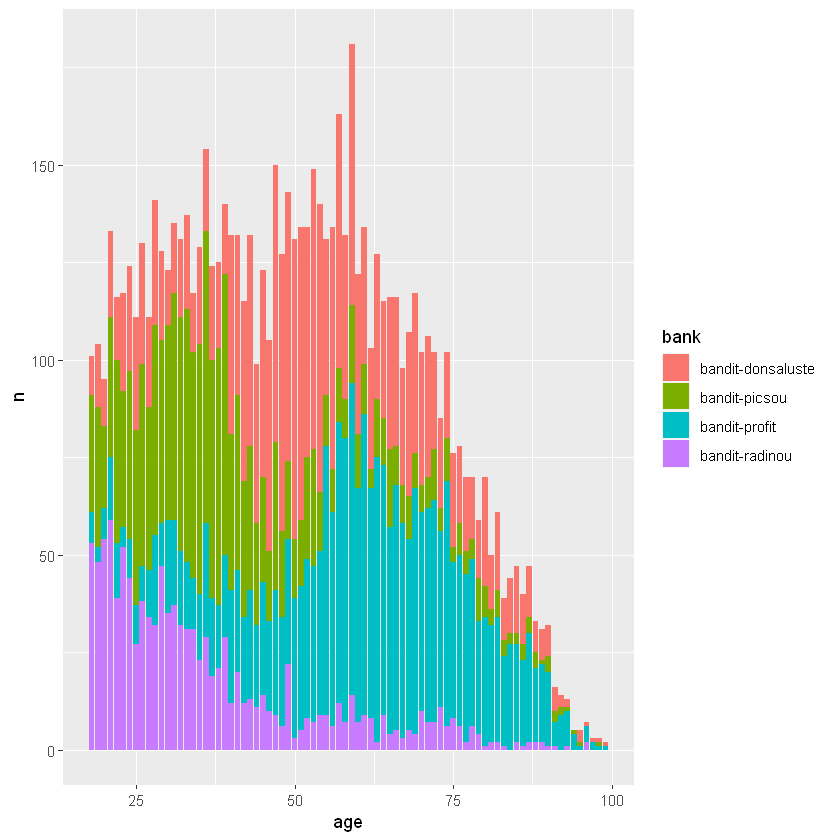

In [9]:
library(ggplot2)
library(dplyr)
new_ages_genders_statuses_banks$bank <- as.character(new_ages_genders_statuses_banks$bank)
counts <- new_ages_genders_statuses_banks %>% count(age, bank)
ggplot(counts, aes(x = age, y = n, fill = bank)) + geom_col()

## 4. Export generated data

In [10]:
write.csv(new_ages_genders_statuses_banks, file = "../workingsets/temp_age_gender_status_salary_bank.csv")